## Proyecto Sprint 13

**Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
- identificar a los grupos objetivo;
- sugerir medidas para reducir la rotación;
- describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Paso 1. Descargar los datos

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
data = pd.read_csv("C:\\Users\\tiddy\\OneDrive\\Documentos\\Datasets\\Sprint 13\\gym_churn_us.csv")

In [3]:
data.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1581,1,1,1,0,1,1,0,31,203.219289,1.0,2,1.735901,0.946676,1
1248,0,1,1,1,1,6,1,26,23.267527,6.0,4,2.162889,2.163300,0
2301,0,0,0,0,1,1,1,27,314.949509,1.0,7,2.092725,2.169277,0
1975,1,1,1,1,0,12,0,32,195.725908,12.0,5,1.561675,1.620218,0
3166,0,1,0,0,1,6,1,26,286.759012,4.0,5,0.545468,0.608415,0
2927,0,1,1,1,1,12,1,30,214.486182,11.0,7,1.337009,1.517474,0
2924,0,1,1,0,0,1,0,30,222.073501,1.0,9,2.825055,2.708025,0
3561,1,1,1,1,1,6,1,31,129.421840,6.0,4,0.368679,0.122602,0
3427,0,1,1,0,1,12,0,26,400.438848,12.0,3,3.858928,3.840772,0
3626,1,1,1,1,1,1,0,27,234.831936,1.0,3,2.228516,2.192393,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

## 2.Llevar a cabo el análisis exploratorio de datos (EDA)


Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [6]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [7]:
churn_analysis = data.groupby("Churn").mean().reset_index()
churn_analysis

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
churn_analysis_melted = pd.melt(churn_analysis, id_vars="Churn", value_vars=['gender', 'Near_Location', 'Partner', 'Promo_friends',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month'], var_name="Factor", value_name="Promedio")
churn_analysis_melted

,Churn,Factor,Promedio
0,0,gender,0.510037
1,1,gender,0.510839
2,0,Near_Location,0.873086
3,1,Near_Location,0.768143
4,0,Partner,0.534195
5,1,Partner,0.355325
6,0,Promo_friends,0.353522
7,1,Promo_friends,0.183789
8,0,Contract_period,5.747193
9,1,Contract_period,1.728558


**Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.**

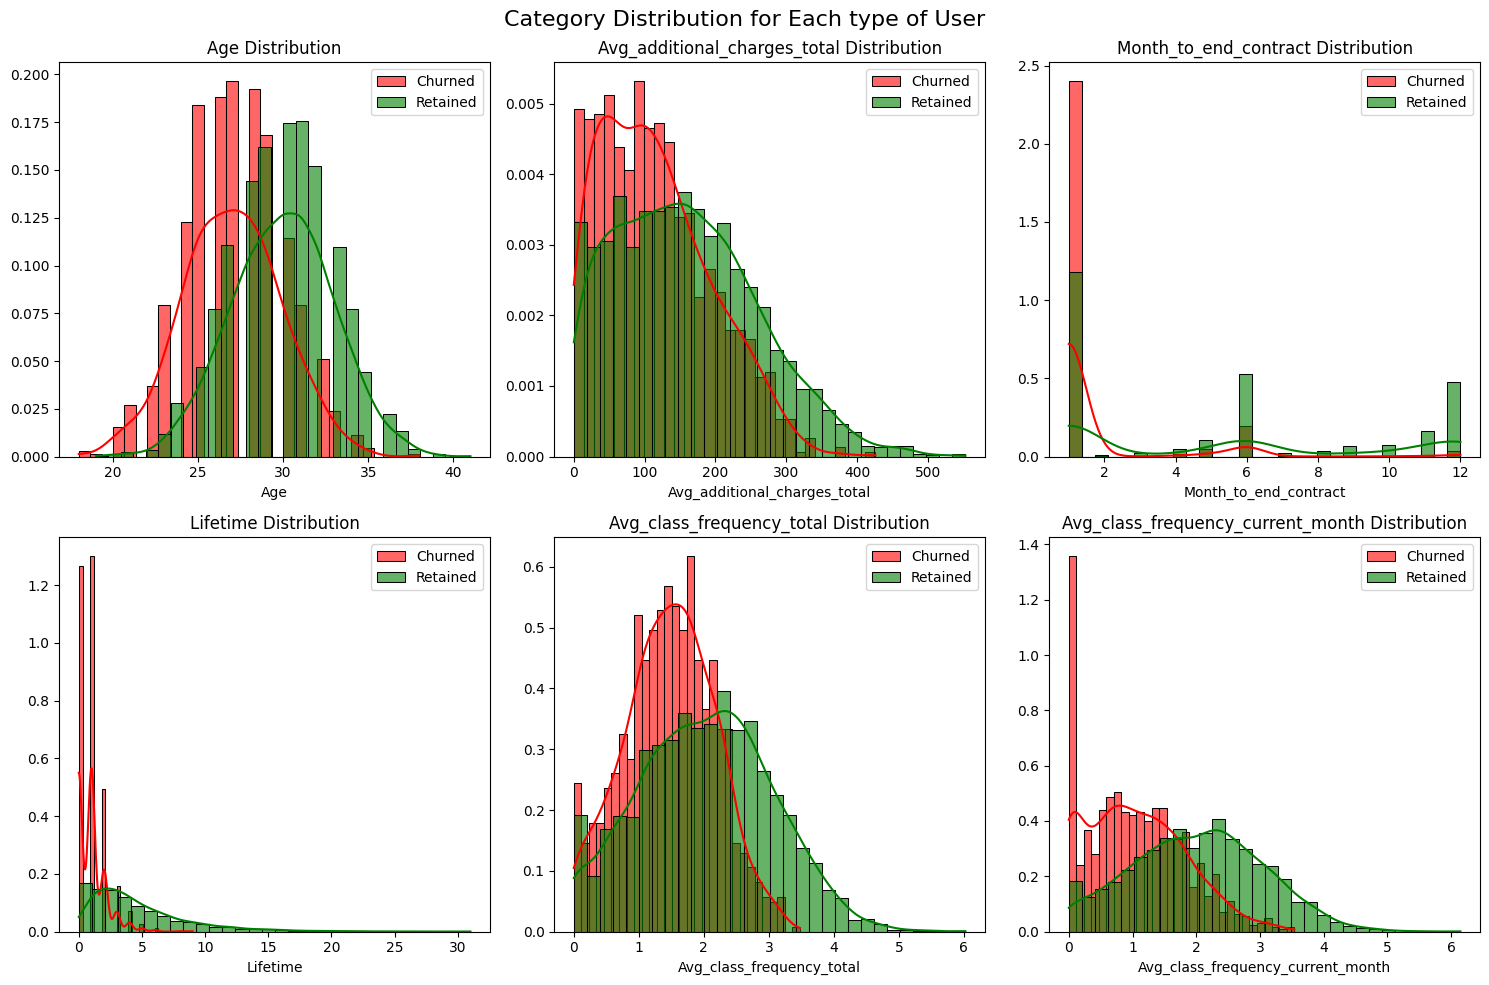

In [45]:

churned = data[data["Churn"] == 1]  
retained = data[data["Churn"] == 0]  

numeric_features = ["Age", "Avg_additional_charges_total", "Month_to_end_contract", 
                    "Lifetime", "Avg_class_frequency_total", "Avg_class_frequency_current_month"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)  
    sns.histplot(churned[feature], color="red", label="Churned", kde=True, bins=30, stat="density", alpha=0.6)
    sns.histplot(retained[feature], color="green", label="Retained", kde=True, bins=30, stat="density", alpha=0.6)
    plt.legend()
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("")

plt.suptitle("Category Distribution for Each type of User", fontsize=16)
plt.tight_layout()
plt.show()


En estas gráficas de distribución podemos identificar varios puntos interesantes y obvios sobre los tipos de miembros del gimnasio:
- Para la distribución **Edad** los *usuarios activos* en el gimnasio se concentran entre sus 30. Mientras que los *usuarios churn* se concentran entre sus 25 a 30 años. Este cnjunto de datos tiene una distribución normal. Por lo que la mayoría de los usuarios está entre sus 25 a 30 años. Este gráfico nos demuestra que nuestro público objetivo se concentran en estas edades. También se puede deducir que los usuarios activos han hecho que el ejercicio pase a ser una rutina frecuente en sus vidas. Mientras que los veinteañeros apenas están empezando con esta actividad o que no forman una disciplina para seguir en el gimnasio.

- Para la distribución de **Cargos Adicionales**  notamos algo particular: los *usuarios churn* tiene una cantidad casi más de 200 usuarios que gastan mucho con 0.005. No obstante, la cantidad de estos cargos se ve afectada con la salida gradual de estos usuarios. Mientras que para los *usuarios activos* tiene casi 250 usuarios que gastan casi lo mismo en cargos adicionales del gimnasio. Por lo que con esta gráfica podemos concluir que los *usuarios churn* tiende a que varios de ellos gasten de más en equipos, ropa, servicios. Se puede deducir que parte de estos usuarios empieza en el gimnasio como principiantes que aún desconocen cómo obtener resultados o cuya falta de experiencian les provoque gastar en su nuevo hobby.

- La gráfica de **Culminación de Contrato** nos muestra una obviedad importante: los *usuarios churn* solo 2.5 mantienen su susbcripción de gimnasio por un mes. Mientras que el siguiente grupo de *usuarios churn* tienen contratos con solo una vigencia de 6 meses. Mientras que los *usuarios activos* tienen mayor variedad de duración de contratos, aunque un mes sigue como el más tiene más usuarios; pero hay 0.5 de usuarios activos con contratos de 6 y 12 meses. Por lo que podemos concluir que gran parte de los *usuarios churn* "prueban" el gimnasio para lograr sus metas de ejercicios. En cambio los *usuarios activos* muestran mayor constancia o usuarios que ya integraron al ejercicio como parte de sus rutinas o algo por lo que vale la pena pagar. 

- El **Tiempo de vida** de los *churn* es muy poca, solo duran de uno a tres meses con su suscripción. Los usuarios *activos* también tienden a bajar, pero sí hay usuarios que pueden durar hasta 15 meses con su suscripción. 

- Para el **Promedio de Clases Asistidas** notamos que gran parte de los *churn* solo asiste a casi dos clases. Por otro lado, los *activos* tampoco toma tantas clases, solo entre 2 a 3 calses. 

- La gráfica que nos muestra **El Promedio de Clases Asistidas en el mes corriente** nos demuestra que los *churn* casi 1.4 de ellos solo toman una clase. Mientras que los *activos* son más frecuentes con casi 3 clases. 

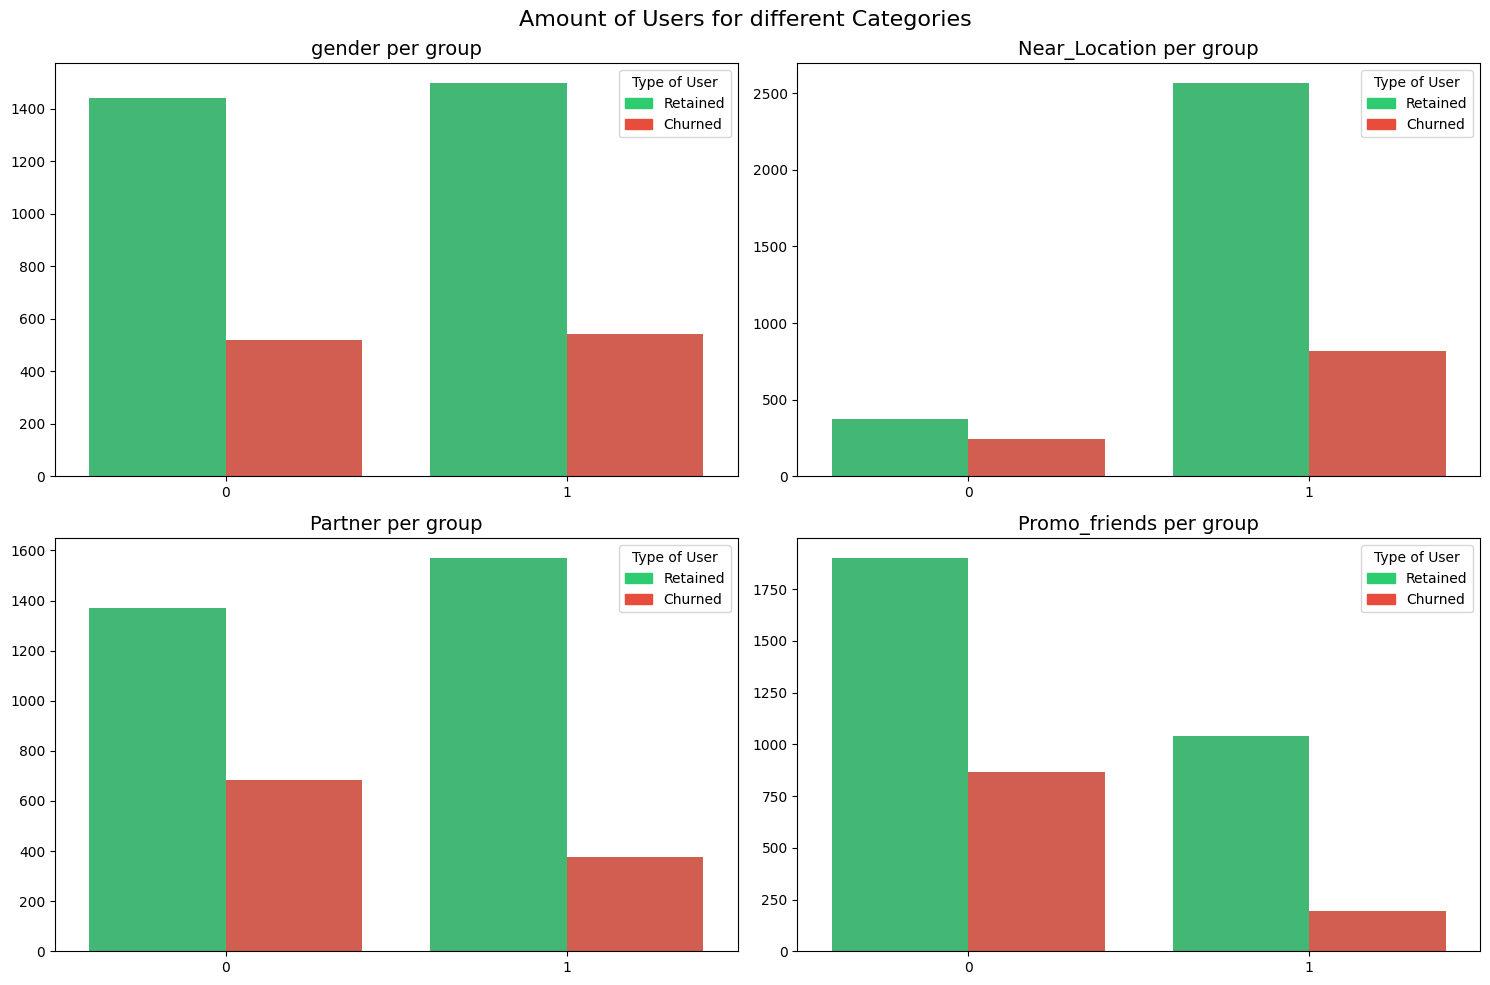

In [51]:

features = ["gender", "Near_Location", "Partner", "Promo_friends"]

# Colores manuales para los clusters
colors = {0: "#2ecc71", 1: "#e74c3c"}

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    counts = data.groupby(["Churn", feature]).size().reset_index(name="count")
    
    # Crear la gráfica de barras con los colores específicos
    sns.barplot(data=counts, x=feature, y="count", hue="Churn", palette=colors)
    
    # Ajustar título con colores en el legend
    plt.title(f"{feature} per group", fontsize=14)
    plt.xlabel("")
    plt.ylabel("")
    
    # Crear manualmente las "patches" para la leyenda (cuadrados de colores)
    handles = [mpatches.Patch(color=colors[0], label="Retained"),
               mpatches.Patch(color=colors[1], label="Churned")]
    
    # Añadir la leyenda personalizada
    plt.legend(title="Type of User", handles=handles, loc="upper right")

plt.suptitle("Amount of Users for different Categories", fontsize=16)
plt.tight_layout()
plt.show()



Para nuestras gráficas de barras se observa los siguiente: 

- Para la cantidad de usuarios que son **hombres y mujeres** (asumiendo que 0 es mujer y 1 para hombres) se nota una distribución casi igual entre los usuarios *churn* y *activos* 

- Para el gráfico de **Cercanía al gimnasio** nos muestra que (asumiendo que 0 es que no vive cerca y 1 si vive cerca) los usuarios que viven cerca del gimnasio son más propensos a ser usuarios activos. Sin embargo, hay casi 1,000 usuarios que sí viven cerca y no mantuvieron su suscripción. 

- Para la comparación de usuarios que tienen un **Descuento para usuarios asociados al gimnasio** (asumiento que 0 es que no tiene un descuento y 1 que sí tiene un descuento) no se nota una diferencia notable entre usuarios churn y activos. Un descuento puede mantener un poco más a los usuarios, con una diferencia de solo 200 usuarios activos más. 

- En el gráfico de **Promo Amigos** hay aspectos que recalcar que pueden explicar los motivos por lo que se inscribe un usuario. Para los usuarios *activos* (asumiendo que 0 es no se inscribió por un amigo y 1 que sí se inscribió por un amigo) nos demuestra que su continuidad en el gimnasio no depende de ir acompañado  por un amigo. Sin embargo, los usuarios *churn* pueden encontrar como motivación que le acompañe un amigo durante su entrenamiento, ya que hay menos usuarios *churn* si es que se inscribieron a través de un programa de referidos.


**Crea una matriz de correlación y muéstrala.**

Text(0.5, 1.0, 'Churn Correlation Matrix')

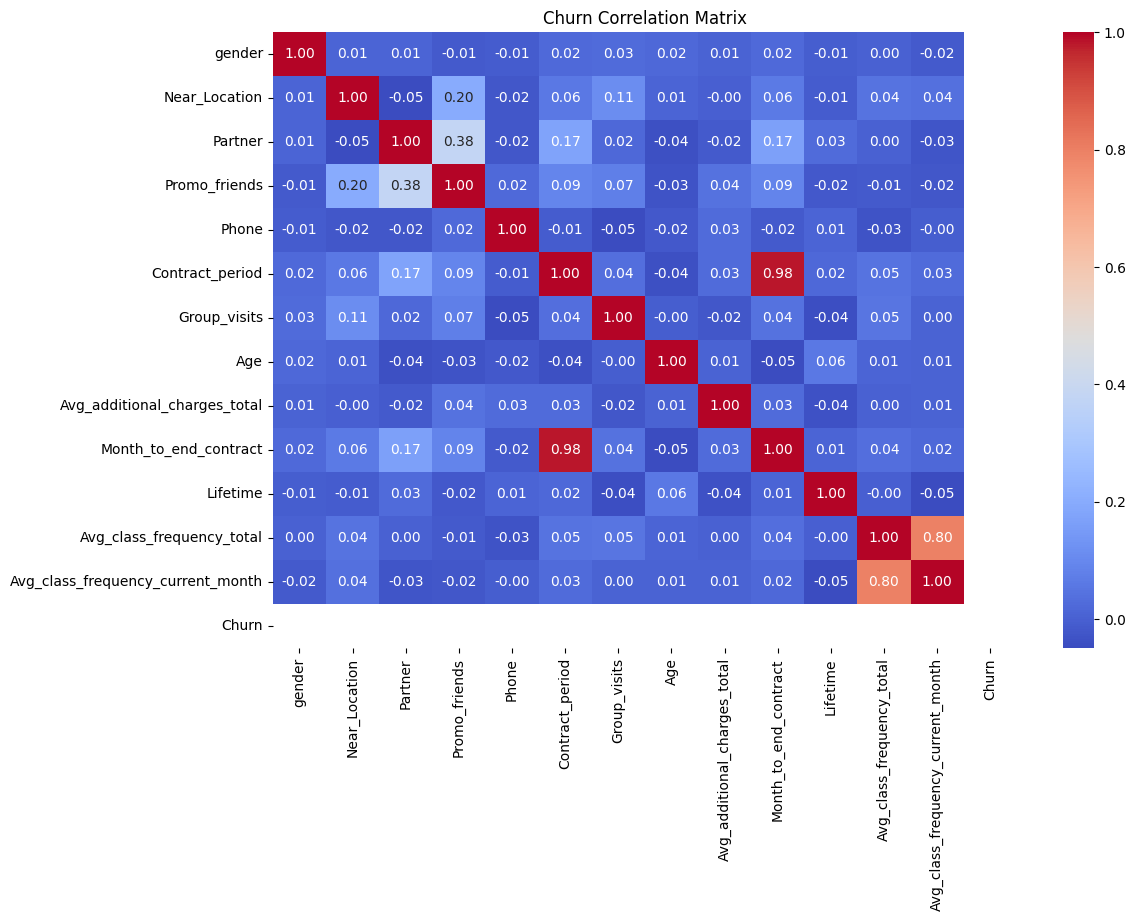

In [11]:
#Crea una matriz de correlación y muéstrala.
plt.figure(figsize=(12, 8))
sns.heatmap(churned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Churn Correlation Matrix")

A partir de la matriz de correlación para los usuarios Churn, notamos lo siguiente: 
 - Hay solo unas características que muestran mayor correlación:
    - Entre *"Contract period"* y *"Month to end contract"* con una correlación de 0.98. Esto quiere decir que los usuarios se salen justo cuando su contrato termina.
    - Entre *Avg class frequency total* y *Avg class frequency current month* con una correlación de 0.80. Por lo tanto, se puede concluir que si una persona tiene buena asistencia en el último mes, es muy probable que también tenga una buena frecuencia total. 

Text(0.5, 1.0, 'Retained Correlation Matrix')

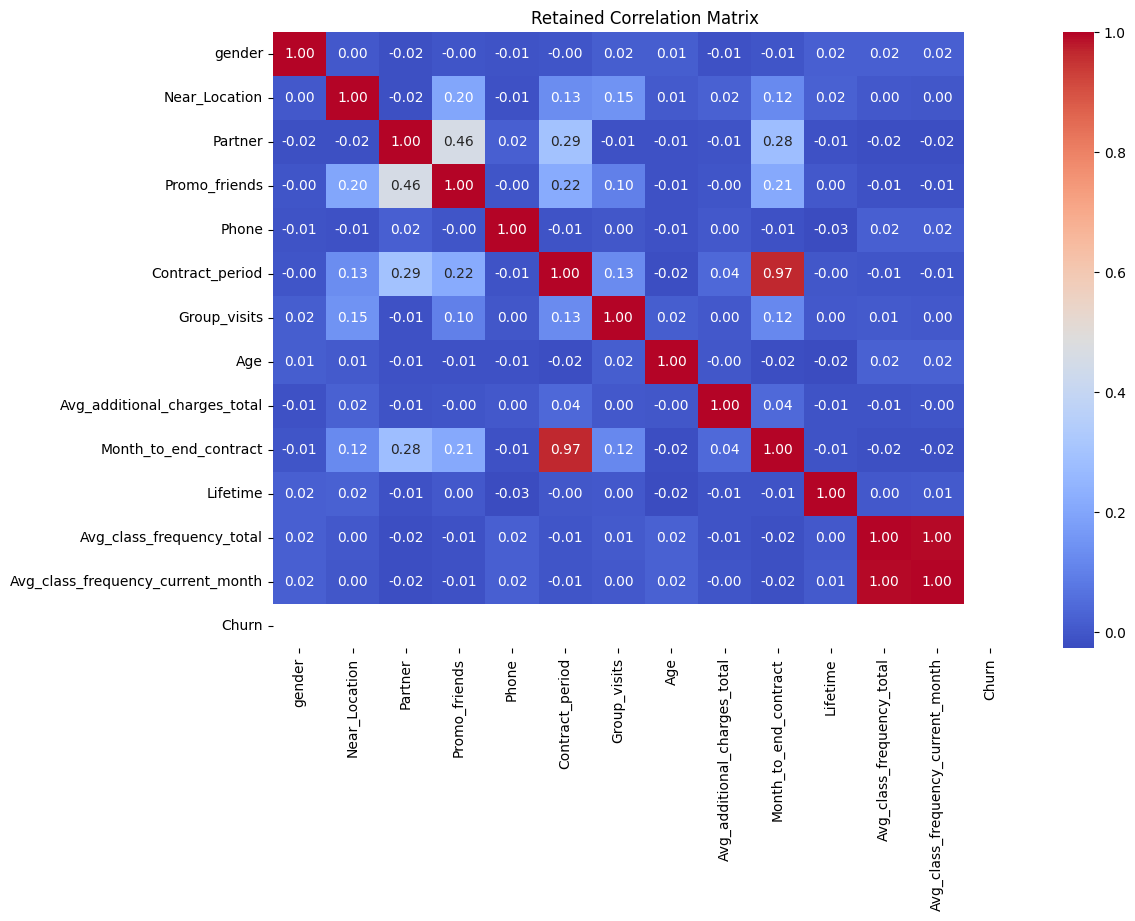

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(retained.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Retained Correlation Matrix")

A partir de la matriz de correlación para los usuarios Retained, notamos que las características con mayor correlación son las mismas: 

 - Entre *"Contract period"* y *"Month to end contract"* con una correlación de 0.97. Esto quiere decir que los usuarios se salen justo cuando su contrato termina. Es solo un poco menor a los de churn.
 - Entre *Avg class frequency total* y *Avg class frequency current month* con una correlación de 1. La correlación es altísima. Por lo tanto, este es un factor alto para que los usuarios se mantengan activos. 

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

**Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.**

- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
    -  regresión logística
    -  bosque aleatorio


In [13]:
#Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()
print('Tamaño del dataset:', data.shape)
X = data.drop("Churn", axis = 1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

Tamaño del dataset: (4000, 14)


In [14]:
#Entrena el modelo en el set de entrenamiento para regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]


c:\Users\tiddy\OneDrive\Documentos\Pandas.app\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#Entrena el modelo en el set de entrenamiento para bosque aleatorio
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

**Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos.**

In [16]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, probabilities)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print()
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)
roc_auc_rf = roc_auc_score(y_test, rf_probabilities)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")


Logistic Regression Metrics:
Accuracy: 0.91
Precision: 0.82
Recall: 0.80
F1 Score: 0.81
ROC AUC: 0.96

Random Forest Metrics:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1 Score: 0.83
ROC AUC: 0.97


**¿Qué modelo dio mejores resultados?**


- El **Random Forest** claramente tiene una mejor precisión, recall, F1 y ROC AUC que la **Regresión Logística**.
- **Regresión Logística** tiene un rendimiento pobre, con un **F1 Score de solo 0.26**, lo que refleja que el modelo no es capaz de capturar correctamente los casos positivos (usuarios que hacen churn) y tiene un rendimiento muy bajo en general.
- El **Random Forest** tiene **altos valores en precisión, recall, F1 y ROC AUC**, lo que significa que es un modelo mucho mejor en este caso para predecir si un usuario va a hacer churn o no.
  

- El modelo **Random Forest**  da mejores resultados. Tiene una alta **precisión (0.84)**, **recall (0.81)** y **F1 Score (0.83)**, lo que significa que es capaz de identificar bien a los usuarios que hacen churn mientras evita clasificar erróneamente a aquellos que no lo hacen. También tiene un **ROC AUC de 0.97**, lo que indica que puede separar por clases de manera precisa. Por lo tanto, este modelo presenta un buen rendimiento en el desempeño de las distintas métricas. 


## Paso 4. Crear clústeres de usuarios/as

**Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):**

- Estandariza los datos.


In [54]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc) 


- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

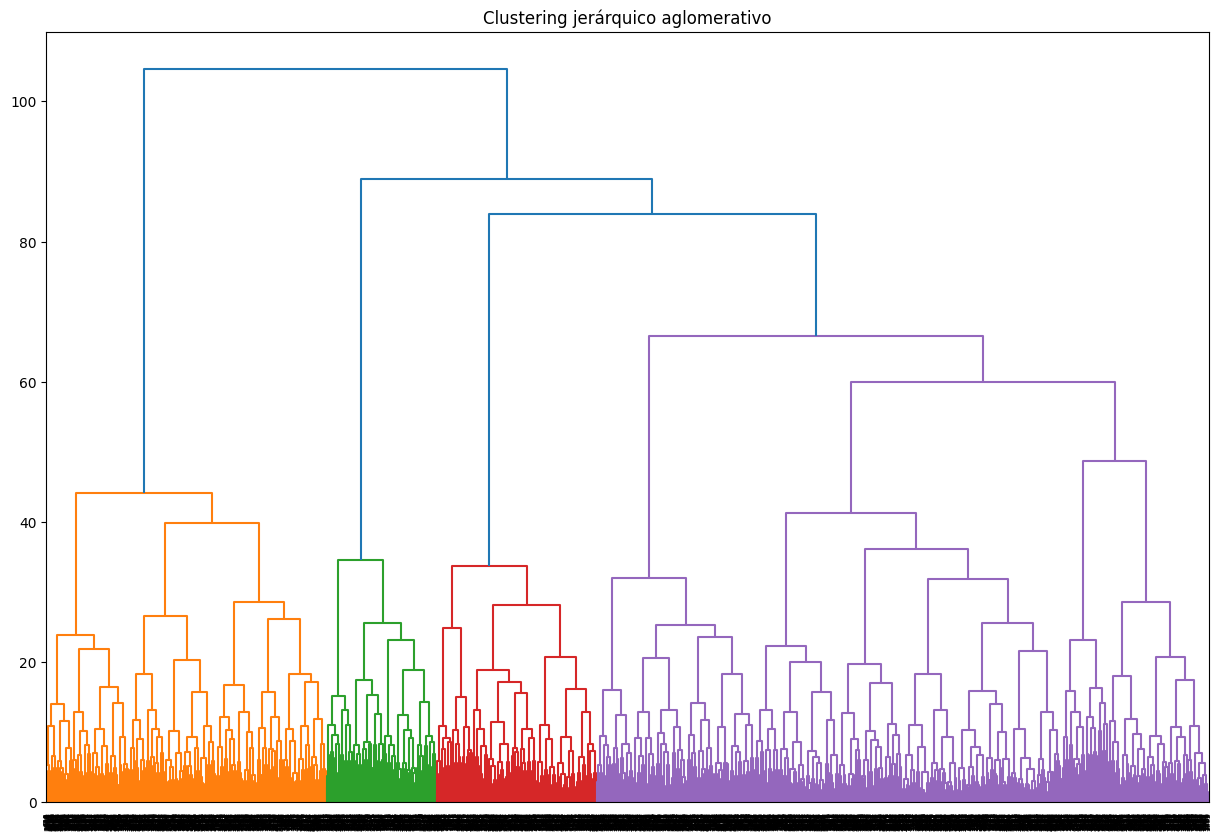

In [55]:
linked = linkage(X_sc, method = "ward")
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation="top")
plt.title("Clustering jerárquico aglomerativo")
plt.show()


- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?


In [56]:
data["cluster_km"] = labels
data.groupby(["cluster_km"]).mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.501012,0.942308,0.773279,0.568826,1.000000,11.058704,0.550607,29.971660,162.029546,10.102227,4.780364,1.985315,1.977532,0.025304
1,0.000000,0.785335,0.366631,0.202976,1.000000,2.031881,0.308183,28.324123,131.300749,1.925611,2.592986,1.383745,1.183009,0.479277
2,1.000000,0.778422,0.399072,0.207657,1.000000,2.045244,0.320186,28.162413,130.844094,1.947796,2.373550,1.292874,1.052052,0.523202
3,0.586165,0.859223,0.379854,0.223301,0.998786,2.768204,0.455097,30.236650,164.956803,2.543689,5.071602,2.945203,2.953305,0.037621
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


- Traza distribuciones de características para los clústeres. ¿Notas algo?

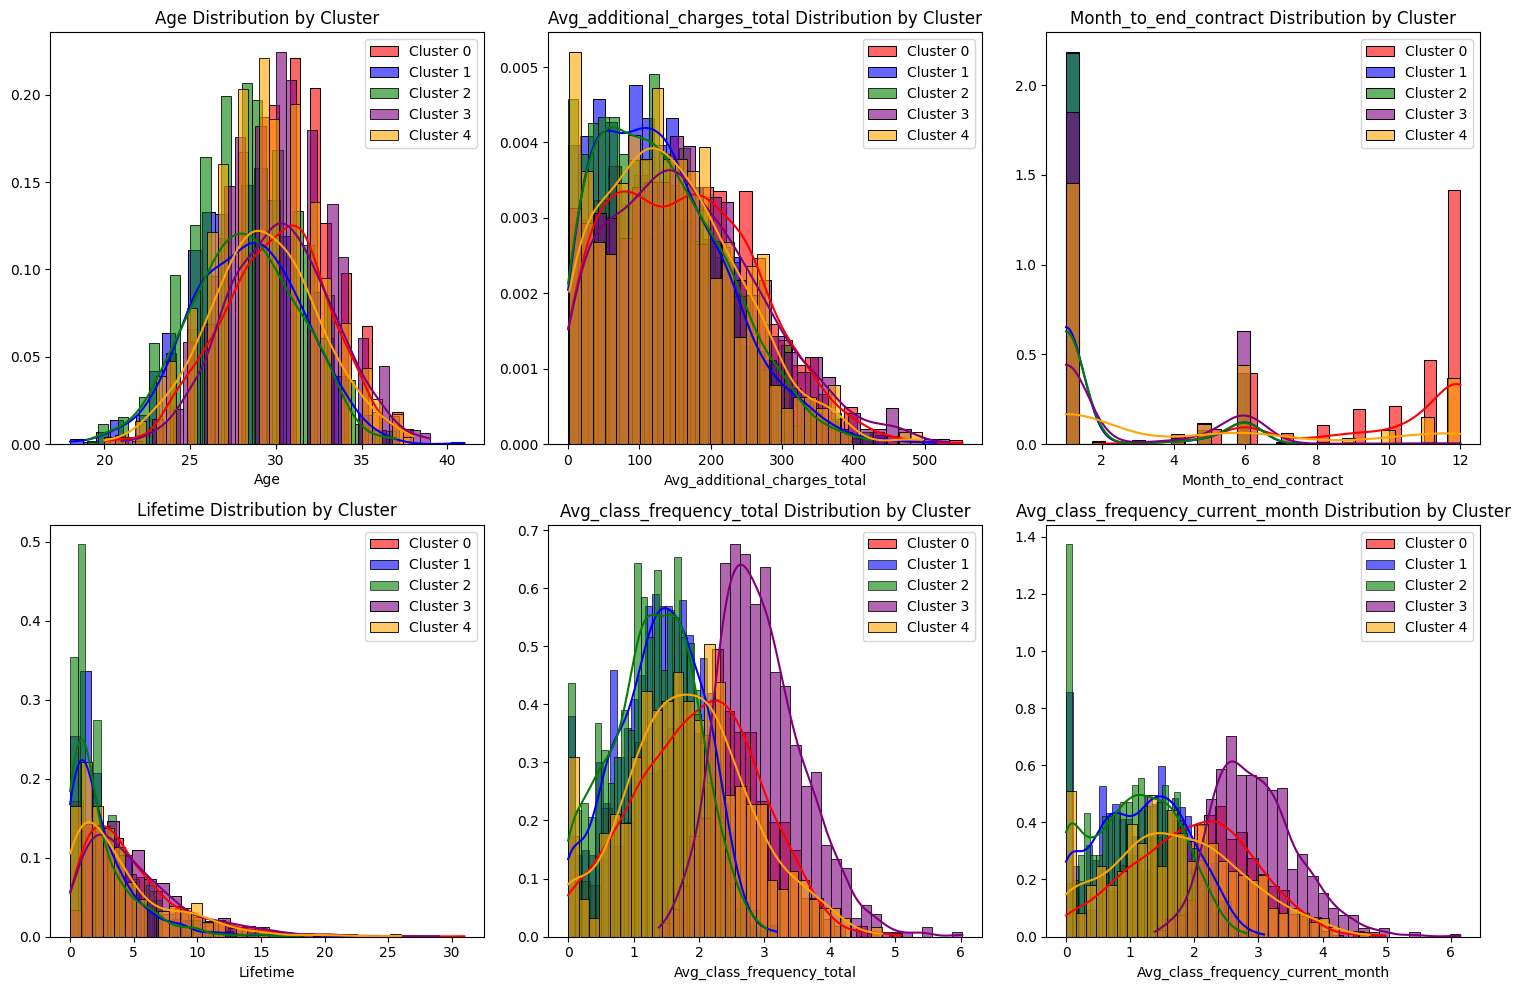

In [57]:
#Traza distribuciones de características para los clústeres. ¿Notas algo?
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)  
    sns.histplot(data[data["cluster_km"] == 0][feature], color="red", label="Cluster 0", kde=True, bins=30, stat="density", alpha=0.6)
    sns.histplot(data[data["cluster_km"] == 1][feature], color="blue", label="Cluster 1", kde=True, bins=30, stat="density", alpha=0.6)
    sns.histplot(data[data["cluster_km"] == 2][feature], color="green", label="Cluster 2", kde=True, bins=30, stat="density", alpha=0.6)
    sns.histplot(data[data["cluster_km"] == 3][feature], color="purple", label="Cluster 3", kde=True, bins=30, stat="density", alpha=0.6)
    sns.histplot(data[data["cluster_km"] == 4][feature], color="orange", label="Cluster 4", kde=True, bins=30, stat="density", alpha=0.6)
    plt.legend()
    plt.title(f"{feature} Distribution by Cluster")
    plt.xlabel(feature)
    plt.ylabel("")
plt.tight_layout()
plt.show()


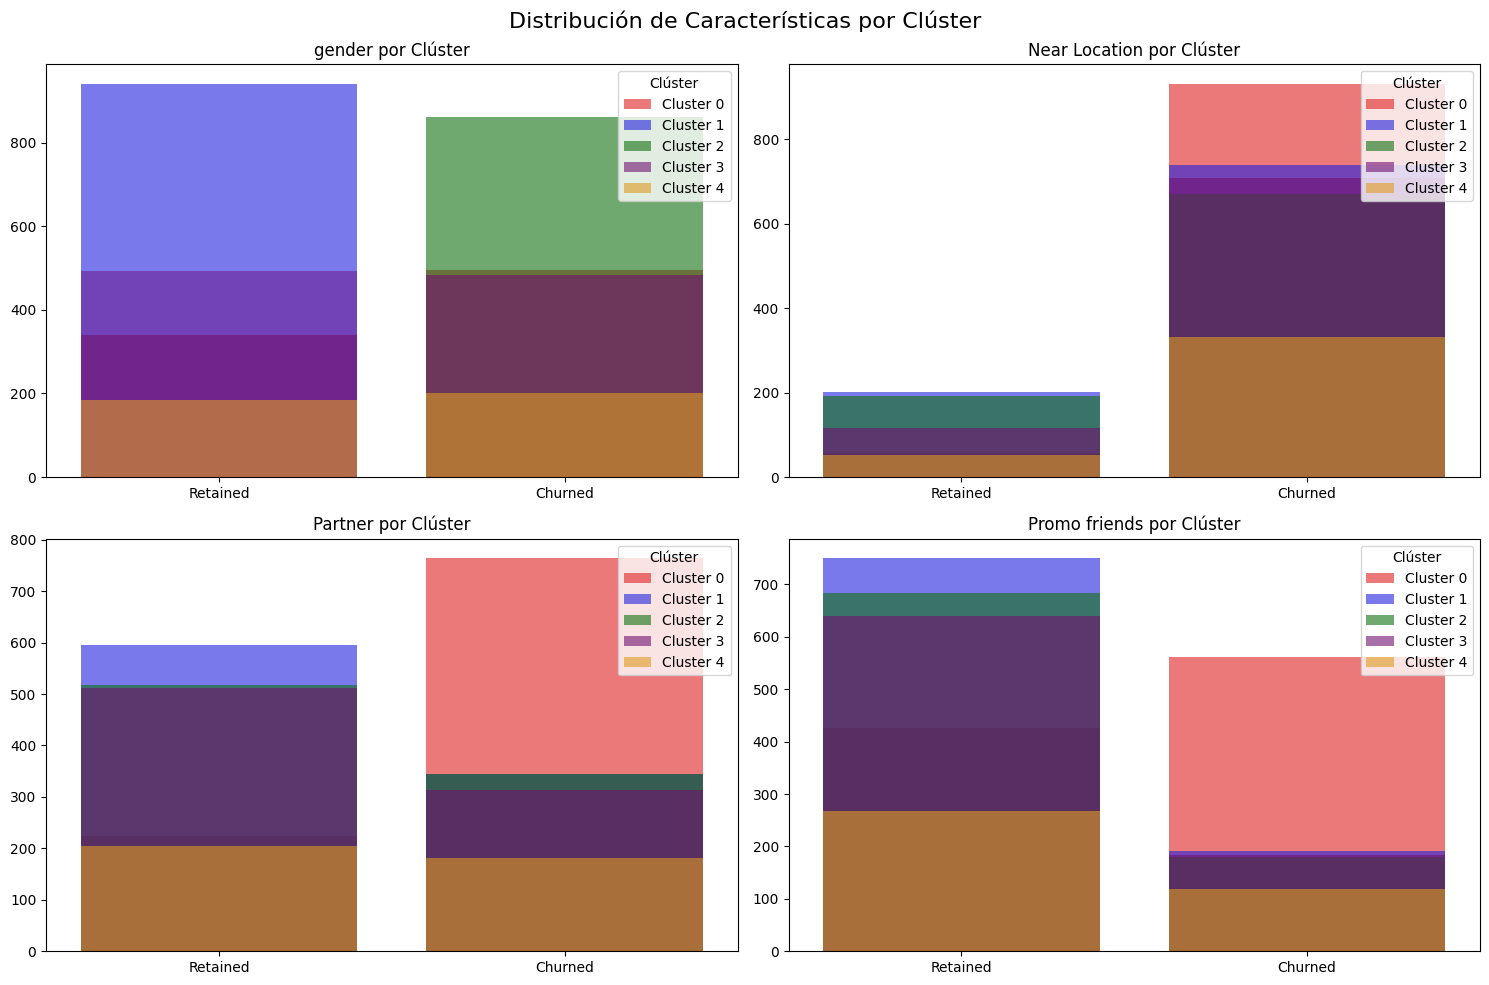

In [58]:

features = ["gender", "Near_Location", "Partner", "Promo_friends"]
clusters = sorted(data["cluster_km"].unique())  

colors = ["red", "blue", "green", "purple", "orange"] 

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    for cluster, color in zip(clusters, colors):
        subset = data[data["cluster_km"] == cluster]
        counts = subset[feature].value_counts().sort_index()
        
        # Asegurarse que hay valores 0 y 1 (aunque no aparezcan en el subset)
        counts = counts.reindex([0, 1], fill_value=0)
        
        sns.barplot(x=counts.index, y=counts.values, color=color, label=f"Cluster {cluster}", alpha=0.6)

    plt.title(f"{feature.replace('_', ' ')} por Clúster")
    plt.xticks([0, 1], ["Retained", "Churned"])
    plt.xlabel("")
    plt.ylabel("")
    plt.legend(title="Clúster", loc="upper right")

plt.suptitle("Distribución de Características por Clúster", fontsize=16)
plt.tight_layout()
plt.show()


A partir de los clústeres creados se puede concluir lo siguiente sobre sus características: 

 **Clúster 1**: 
   - Edad 28.5 años
   - Género equilibrado
   - No se inscribieron a través de un amigo. 
   - Contratos cortos de aproximadamente casi 2 meses
   - Asistencia media con 1.47.
   - Con un riesgo moderado de abandonar su suscripción de aproximadamente 0.45

  **Clúster 2**
   - Usuarios más jóvenes con aproximadamente 28 años.
   - No provienen tanto de referidos o de amigos, ni tampoco de compañías.
   - Contratos cortos de solo dos meses. 
   - Asistencia muy baja con 1.31 clases.
   - El Churn más alto con 0.52
   - **El grupo menos estable y con probabilidad no renovar su suscripción**

  **Clúter 3**
   - Edad: 30.3 años
   - Compuesto principalmente por mujeres
   - Baja tasa de churn con un 0.5 aprox

  **Clúster 4**
   - Edad: 29.9 años
   - Género balanceado
   - Contratos largos, varios meses activos. Hasta 11 meses de duración de contrato. 
   - El churn más bajo con solo 0.22
   - **Este es el grupo más leal y estable**

  **Clúster 5**
   - Edad: 29.1 años
   - Es el que proviene de programa de referidos de amigos.
   - El grupo que vive más cera. 
   - Duración de contratos considerables. Entre 3 meses aproximadamente. 
   - Un churn de 0.26 el cual sería moderado. 

- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). 

¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [59]:
#Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). 
# ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?
cluster_churn_rate = data.groupby("cluster_km")["Churn"].mean().reset_index()
cluster_churn_rate.columns = ["Cluster", "Churn Rate"]
cluster_churn_rate


,Cluster,Churn Rate
0,0,0.025304
1,1,0.479277
2,2,0.523202
3,3,0.037621
4,4,0.267532


La tasa de cancelación sería la siguiente: 
- *Clúster 1*: **44.87%**	Casi la mitad se da de baja. Es de "Alto riesgo".
- *Clúster 2*: **51.68%**	El que refleja la mayor tasa de cancelación. Es de "Riesgo crítico".
- *Clúster 3*: **5.71%**	Usuarios más comprometidos y leales. Son de "Bajo riesgo".
- *Clúster 4*: **2.25%**	El mejor clúster. Es de "Riesgo mínimo".
- *Clúster 5*: **26.34%**	Usuarios regulares. Es de "Riesgo medio".

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
- Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

- No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

A partir del análisis se sugieren las siguientes implementaciones: 
- Crear programas de fidelización para usuarios de Cluster 3 y 4, que tienen tasas de churn muy bajas (<6%). Esto se puede lograr a través de beneficios exclusivos por permanencia, eventos VIP, y recompensas por traer nuevos miembros.

- Diseñar campañas de reactivación para el Cluster 2, que presenta una tasa de abandono superior al 50%.Esto se puede lograr a través de mensajes personalizados de motivación, ofertas limitadas de renovación y clases gratuitas para probar nuevas actividades. 

- Potenciar la dinámica del Cluster 5, muy activo socialmente, pero con churn medio (≈26%). Como medida se pueden organizar desafíos grupales, recompensas por asistir con amigos, programas de entrenamiento en pareja.

- Trabajar con los usuarios del Cluster 1, que tienen contratos cortos y participación media-baja. Algunas recomendaciones son clases exprés de prueba, rutinas guiadas desde alguna app, y asesoramiento de bienvenida para crear hábito.
